In [14]:

import pandas as pd



In [15]:
p_day=7

In [16]:
df=pd.read_csv("INFY.csv")
df.dtypes

Unnamed: 0     object
Open          float64
High          float64
Low           float64
Close         float64
Adj Close     float64
Volume          int64
dtype: object

In [17]:
len(df)

3450

In [18]:
df.tail()


,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
3445,2021-09-24 13:15:00+05:30,1766.800049,1772.949951,1766.599976,1767.75,1771.699951,667263
3446,2021-09-24 14:15:00+05:30,1771.699951,1772.500000,1760.150024,1768.90,1764.400024,1200835
3447,2021-09-24 15:15:00+05:30,1764.400024,1766.000000,1763.000000,1771.70,1764.099976,535790
3448,2021-09-27 09:15:00+05:30,1759.699951,1768.750000,1738.750000,1778.10,1741.550049,1168663
3449,2021-09-27 10:14:14+05:30,1742.349976,1742.349976,1742.349976,1779.90,1742.349976,0


In [19]:
df1=df.reset_index()['Close']

In [20]:
df1.dropna()

0        524.20
1        527.80
2        528.00
3        529.15
4        530.15
         ...   
3445    1767.75
3446    1768.90
3447    1771.70
3448    1778.10
3449    1779.90
Name: Close, Length: 3450, dtype: float64

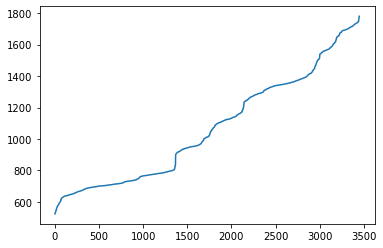

In [21]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [22]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [23]:
import numpy as np

In [24]:
df1

0        524.20
1        527.80
2        528.00
3        529.15
4        530.15
         ...   
3445    1767.75
3446    1768.90
3447    1771.70
3448    1778.10
3449    1779.90
Name: Close, Length: 3450, dtype: float64

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [26]:
print(df1)

[[0.        ]
 [0.00286693]
 [0.0030262 ]
 ...
 [0.99346978]
 [0.99856654]
 [1.        ]]


In [27]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [28]:
training_size,test_size

(2242, 1208)

In [29]:
train_data

array([[0.        ],
       [0.00286693],
       [0.0030262 ],
       ...,
       [0.59460858],
       [0.59472804],
       [0.59588277]])

In [30]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [31]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = p_day
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [32]:
print(X_train.shape), print(y_train.shape)

(2234, 7)
(2234,)


(None, None)

In [33]:
print(X_test.shape), print(ytest.shape)

(1200, 7)
(1200,)


(None, None)

In [34]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [35]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [36]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(p_day,1)))
model.add(Dropout(0.5))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(50))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 50)             10400     
_________________________________________________________________
dropout (Dropout)            (None, 7, 50)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 50)             20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 7, 50)             20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=10,verbose=2)

Epoch 1/150
224/224 - 9s - loss: 0.0022 - val_loss: 0.0078
Epoch 2/150
224/224 - 5s - loss: 0.0018 - val_loss: 0.0122
Epoch 3/150
224/224 - 5s - loss: 0.0016 - val_loss: 0.0087
Epoch 4/150
224/224 - 5s - loss: 0.0015 - val_loss: 0.0188
Epoch 5/150
224/224 - 5s - loss: 0.0012 - val_loss: 0.0070
Epoch 6/150
224/224 - 5s - loss: 0.0012 - val_loss: 0.0063
Epoch 7/150
224/224 - 5s - loss: 0.0010 - val_loss: 0.0013
Epoch 8/150
224/224 - 4s - loss: 9.4507e-04 - val_loss: 0.0069
Epoch 9/150
224/224 - 5s - loss: 0.0010 - val_loss: 0.0044
Epoch 10/150
224/224 - 5s - loss: 9.1244e-04 - val_loss: 0.0037
Epoch 11/150
224/224 - 5s - loss: 9.8920e-04 - val_loss: 0.0177
Epoch 12/150
224/224 - 5s - loss: 8.4814e-04 - val_loss: 0.0108
Epoch 13/150
224/224 - 5s - loss: 8.9533e-04 - val_loss: 0.0176
Epoch 14/150
224/224 - 5s - loss: 9.5157e-04 - val_loss: 0.0275
Epoch 15/150
224/224 - 5s - loss: 8.3373e-04 - val_loss: 0.0334
Epoch 16/150
224/224 - 5s - loss: 8.4782e-04 - val_loss: 0.0387
Epoch 17/150
224/

In [39]:
import tensorflow as tf

In [40]:
tf.__version__

'2.6.0'

In [41]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [42]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [43]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

878.6256115810002

In [44]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1451.5505188850345

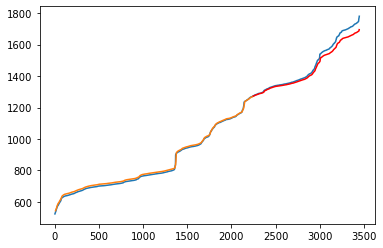

In [45]:
### Plotting 
# shift train predictions for plotting
look_back=p_day
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot,color="red")
plt.show()

In [46]:
len(test_data)

1208

In [47]:
x_input=test_data[len(test_data)-p_day-1:].reshape(1,-1)
x_input.shape


(1, 8)

In [48]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [49]:
len(temp_input)

8

In [59]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=p_day
futureDays=30
i=0

while(i<futureDays):
    
    if(len(temp_input)>p_day):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.99856654 1.         0.93820602 0.93905252 0.93939698 0.93778598
 0.93390524]
0 day output [[0.92660165]]
1 day input [1.         0.93820602 0.93905252 0.93939698 0.93778598 0.93390524
 0.92660165]
1 day output [[0.9142591]]
2 day input [0.93820602 0.93905252 0.93939698 0.93778598 0.93390524 0.92660165
 0.91425908]
2 day output [[0.8973657]]
3 day input [0.93905252 0.93939698 0.93778598 0.93390524 0.92660165 0.91425908
 0.89736569]
3 day output [[0.89625]]
4 day input [0.93939698 0.93778598 0.93390524 0.92660165 0.91425908 0.89736569
 0.89625001]
4 day output [[0.8936431]]
5 day input [0.93778598 0.93390524 0.92660165 0.91425908 0.89736569 0.89625001
 0.89364308]
5 day output [[0.88914806]]
6 day input [0.93390524 0.92660165 0.91425908 0.89736569 0.89625001 0.89364308
 0.88914806]
6 day output [[0.8829101]]
7 day input [0.92660165 0.91425908 0.89736569 0.89625001 0.89364308 0.88914806
 0.88291007]
7 day output [[0.8753622]]
8 day input [0.91425908 0.89736569 0.89625001 0.

In [60]:
day_new=np.arange(1,futureDays+1)
day_pred=np.arange(p_day+1,p_day+1+futureDays)

In [61]:
import matplotlib.pyplot as plt

In [62]:
len(df1)

3450

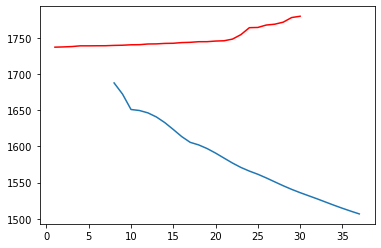

In [63]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-futureDays:]),color="red")
plt.plot(day_pred,scaler.inverse_transform(lst_output))

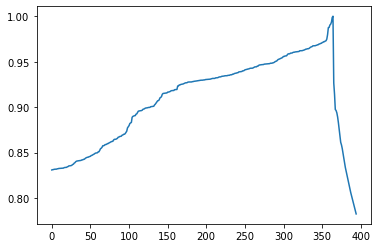

In [64]:
df3=df1.tolist()
df3.extend(lst_output)


plt.plot(df3[len(df1)-365:])

In [65]:
df3=scaler.inverse_transform(df3).tolist()
df4 = pd.DataFrame(df3,columns =['Close'])
df4


,Close
0,524.200000
1,527.800000
2,528.000000
3,529.150000
4,530.150000
...,...
3475,1523.157975
3476,1518.740366
3477,1514.510245
3478,1510.516112


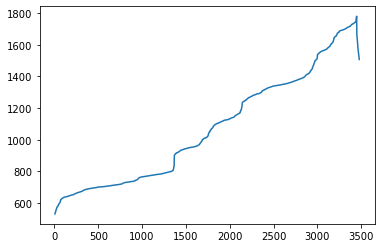

In [66]:
plt.plot(df4["Close"][5:])
plt.show()

In [67]:

plt.plot(df3,color="red")
plt.plot(df_temp["Close"])
plt.show()

print(df3[-31:-23])
print(df_temp["Close"][-31:])

FileNotFoundError: [Errno 2] No such file or directory: 'RELIANCEtemp.csv'